# Image Classification - Lab

## Introduction

Now that you have a working knowledge of CNNs and have practiced implementing associated techniques in Keras, its time to put all of those skills together. In this lab, you'll work to complete a Kaggle competition on classifying dog breeds.

https://www.kaggle.com/c/dog-breed-identification

## Objectives

You will be able to:
* Independently design and build a CNN for image classifcation tasks
* Compare and apply multiple techniques for tuning a model including data augmentation and adapting pretrained models

## Download and Load the Data

Start by downloading the data locally and loading it into a Pandas DataFrame. Be forewarened that this dataset is fairly large and it is advisable to close other memory intensive applications.

The data can be found here:

https://www.kaggle.com/c/dog-breed-identification/data

We recommend downloading the data into this directory on your local computer. From there, be sure to uncompress the folder and subfolders.

In [1]:
import bs_ds as bs
from bs_ds.imports import *

View our documentation at https://bs-ds.readthedocs.io/en/latest/index.html
For convenient loading of standard modules :
>> from bs_ds.imports import *



,Module/Package Handle
pandas,pd
numpy,np
matplotlib,mpl
matplotlib.pyplot,plt
seaborn,sns


To disable styled DataFrames run html_off() at the bottom of any cell.
 To re-enable use html_on() at the bottom of any cell.


In [2]:
#No code persay, but download and decompress the data.

## Preprocessing

Now that you've downloaded the data, its time to prepare it for some model building! You'll notice that the current structure provided is not the same as our lovely preprocessed folders that we've been providing you. Instead, you have one large training folder with images and a csv file with labels associated with each of these file types. 

Use this to create a directory substructure for a train-validation-test split as we have done previously. Also recall from our previous work that you'll also want to use one-hot encoding as we are now presented with a multi-class problem as opposed to simple binary classification.

In [3]:
#Your code here; open the labels.csv file stored in the zip file
labels = 'data_raw/labels.csv'
df = pd.read_csv(labels)
# df.set_index('id',inplace=True)
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
id       10222 non-null object
breed    10222 non-null object
dtypes: object(2)
memory usage: 159.8+ KB


We wish to create our standard directory structure:
* train
    * category1
    * category2
    * category3
    ...
* val
    * category1
    * category2
    * category3
    ...
* test 
    * category1
    * category2
    * category3
    ...  

In [5]:
import os, shutil
new_root_dir = "data_org/"
if os.path.exists(new_root_dir)==0:
    os.mkdir(new_root_dir)
    
    
raw_test_dir = "data_raw/test/"
raw_train_dir = "data_raw/train/"  
    
# Define the directory of images to be used and split as old_dir
old_dir = raw_train_dir # specify current directory of training data to be split

# Define directories to make in new_root_dir
dir_names = ['train', 'val', 'test']

In [6]:
# Check if the folders for 'train' datasets already exists 
check_for_dir_path= os.path.join(new_root_dir,dir_names[0])

if os.path.exists(check_for_dir_path):
    create_dirs_copy_data = input(f'The folder{check_for_dir_path} already exists.\nYou may have previously created the data folders.\n Delete the old folder and run this cell anyway?(y/n):')    
else:
    create_dirs_copy_data = 'y'
    
# Create new sub-directories for each breed inside all dir_names folders
if create_dirs_copy_data.lower()=='y':
#     list_to_remove = [os.path.join(new_root_dir,file) for file in os.listdir(new_root_dir)]
#     [os.remove(x) for x in list_to_remove]
#     os.mkdir(new_root_dir)


    for d in dir_names:
        new_dir = os.path.join(new_root_dir, d)

        if os.path.exists(new_dir)==0:
            os.mkdir(new_dir)

    for breed in df.breed.unique():
        print('Moving {} pictures.'.format(breed))
        #Create sub_directories
        for d in dir_names:
            new_dir = os.path.join(new_root_dir, d, breed)
            if os.path.exists(new_dir)==0:
                os.mkdir(new_dir)

        #Subset dataframe into train, validate and split sets
        #Split is performed here to ensure maintain class distributions.
        temp = df[df.breed == breed]
        train, validate, test = np.split(temp.sample(frac=1), [int(.8*len(temp)), int(.9*len(temp))])
        print('Split {} imgs into {} train, {} val, and {} test examples.'.format(len(temp),
                                                                                  len(train),
                                                                                  len(validate),
                                                                                  len(test)))
        for i, temp in enumerate([train, validate, test]):
            for row in temp.index:
                filename = temp['id'][row] + '.jpg'
                origin = os.path.join(old_dir + filename)
                destination = os.path.join(new_root_dir + dir_names[i] + '/' + breed + '/' + filename)
                shutil.copy(origin, destination)
else:
    print('Skipping this cell...')


Moving boston_bull pictures.
Split 87 imgs into 69 train, 9 val, and 9 test examples.
Moving dingo pictures.
Split 80 imgs into 64 train, 8 val, and 8 test examples.
Moving pekinese pictures.
Split 75 imgs into 60 train, 7 val, and 8 test examples.
Moving bluetick pictures.
Split 85 imgs into 68 train, 8 val, and 9 test examples.
Moving golden_retriever pictures.
Split 67 imgs into 53 train, 7 val, and 7 test examples.
Moving bedlington_terrier pictures.
Split 89 imgs into 71 train, 9 val, and 9 test examples.
Moving borzoi pictures.
Split 75 imgs into 60 train, 7 val, and 8 test examples.
Moving basenji pictures.
Split 110 imgs into 88 train, 11 val, and 11 test examples.
Moving scottish_deerhound pictures.
Split 126 imgs into 100 train, 13 val, and 13 test examples.
Moving shetland_sheepdog pictures.
Split 76 imgs into 60 train, 8 val, and 8 test examples.
Moving walker_hound pictures.
Split 69 imgs into 55 train, 7 val, and 7 test examples.
Moving maltese_dog pictures.
Split 117 img

Moving dandie_dinmont pictures.
Split 89 imgs into 71 train, 9 val, and 9 test examples.
Moving great_pyrenees pictures.
Split 111 imgs into 88 train, 11 val, and 12 test examples.
Moving beagle pictures.
Split 105 imgs into 84 train, 10 val, and 11 test examples.
Moving vizsla pictures.
Split 70 imgs into 56 train, 7 val, and 7 test examples.
Moving west_highland_white_terrier pictures.
Split 81 imgs into 64 train, 8 val, and 9 test examples.
Moving kerry_blue_terrier pictures.
Split 82 imgs into 65 train, 8 val, and 9 test examples.
Moving whippet pictures.
Split 95 imgs into 76 train, 9 val, and 10 test examples.
Moving sealyham_terrier pictures.
Split 88 imgs into 70 train, 9 val, and 9 test examples.
Moving standard_poodle pictures.
Split 79 imgs into 63 train, 8 val, and 8 test examples.
Moving keeshond pictures.
Split 81 imgs into 64 train, 8 val, and 9 test examples.
Moving japanese_spaniel pictures.
Split 105 imgs into 84 train, 10 val, and 11 test examples.
Moving miniature_p

In [14]:
#Your code here; transform the image files and then load them into Keras as tensors 
#(be sure to perform a train-val-test split)
from keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img
train_dir = new_root_dir+'train/'
val_dir = new_root_dir+'val/'
test_dir = new_root_dir+'test/'


data_org/train/ data_org/val/ data_org/test/


In [60]:
# train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_dir, 
        target_size=(240, 240), 
        batch_size = 20,
        class_mode= 'categorical')



train_generator = train_datagen.flow_from_directory(
train_dir, 
target_size=(240,240),
batch_size = 20,
class_mode = 'categorical')



test_datagen = ImageDataGenerator(rescale=1./255)

# validation_generator = test_datagen.flow_from_directory(
# val_dir, 
# target_size=(150,150),
# batch_size = 20,
# class_mode = 'categorical')

Found 1017 images belonging to 120 classes.
Found 8127 images belonging to 120 classes.


In [61]:
len(train_generator.class_indices)

120

## Optional: Build a Baseline CNN

This is an optional step. Adapting a pretrained model will produce better results, but it may be interesting to create a CNN from scratch as a baseline. If you wish to, do so here.

In [62]:
# #Create a baseline CNN model
# from keras import models, layers, optimizers


# model = models.Sequential()

# model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
# model.add(layers.MaxPooling2D(pool_size=(2,2)))

# model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2,2)))

# model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2,2)))

# model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2,2)))

# num_breeds = len(train_generator.class_indices)
# model.add(layers.Flatten())

# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(512, activation='relu'))

# model.add(layers.Dense(num_breeds, activation='sigmoid'))

In [63]:
# SOLUTION'S NETWORK
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(240, 240, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(120, activation='sigmoid'))


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 238, 238, 32)      896       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 117, 117, 64)      18496     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 58, 58, 64)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 26, 26, 128)       147584    
__________

In [64]:
import datetime
start = datetime.datetime.now()

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=val_generator,
      validation_steps=50)


end = datetime.datetime.now()
elapsed = end-start
print(f'Training the model took {elapsed/60} mins.')

Epoch 1/30
100/100 [==============================] - 172s 2s/step - loss: 4.7875 - acc: 0.0075 - val_loss: 4.7874 - val_acc: 0.0080
Epoch 2/30
100/100 [==============================] - 174s 2s/step - loss: 4.7878 - acc: 0.0080 - val_loss: 4.7863 - val_acc: 0.0110
Epoch 3/30
100/100 [==============================] - 185s 2s/step - loss: 4.7872 - acc: 0.0085 - val_loss: 4.7853 - val_acc: 0.0120
Epoch 4/30
100/100 [==============================] - 178s 2s/step - loss: 4.7879 - acc: 0.0120 - val_loss: 4.7850 - val_acc: 0.0100
Epoch 5/30
100/100 [==============================] - 195s 2s/step - loss: 4.7806 - acc: 0.0090 - val_loss: 4.7807 - val_acc: 0.0110
Epoch 6/30
100/100 [==============================] - 173s 2s/step - loss: 4.7765 - acc: 0.0115 - val_loss: 4.7721 - val_acc: 0.0140
Epoch 7/30
100/100 [==============================] - 178s 2s/step - loss: 4.7759 - acc: 0.0140 - val_loss: 4.7688 - val_acc: 0.0110
Epoch 8/30
100/100 [==============================] - 182s 2s/step - 

In [65]:
# import datetime
# start = datetime.datetime.now()

# history = model.fit_generator(train_generator,epochs=30, steps_per_epoch=100,
#                               validation_data=validation_generator,validation_steps=50)
# end = datetime.datetime.now()
# elapsed = end-start
# print(f'Training the model took {elapsed/60} mins.')

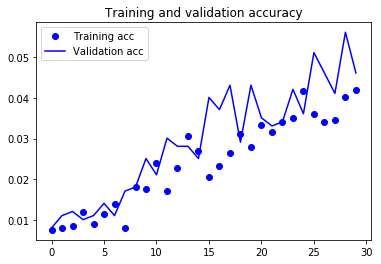

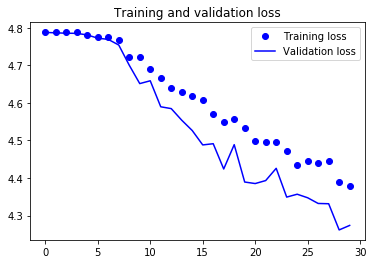

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [67]:
#  model.save('CNN_base_model_using_solution.h5')

In [72]:
# test_loss, test_acc = model.evaluate_generator(val_generator, steps=54)
# y_hat_test = model.predict_generator(val_generator, steps=54)

# print(f'Generated {len(y_hat_test)} predictions')
# print('test acc:', test_acc)

### TRYING OUT LIME

In [ ]:
# # Testing out LIME
# %load_ext autoreload
# %autoreload 2
# import os,sys
# try:
#     import lime
# except:
#     sys.path.append(os.path.join('..', '..')) # add the current directory
#     import lime
# from lime import lime_image

In [ ]:
# explainer = lime_image.LimeImageExplainer()

# %%time
# # Hide color is the color for a superpixel turned OFF.
# # Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
# explanation = explainer.explain_instance(images[0],
#                                          inet_model.predict,
#                                          top_labels=5,
#                                          hide_color=0,
#                                          num_samples=1000)

In [ ]:
# # Display only ---identified regions?
# from skimage.segmentation import mark_boundaries

# temp, mask = explanation.get_image_and_mask(295, positive_only=True, num_features=5, hide_rest=True)
# plt.imshow(mark_boundaries(temp / 2+0.5, mask))

## Loading a Pretrained CNN

## Feature Engineering with the Pretrained Model

Now that you've loaded a pretrained model, it's time to adapt that convolutional base and add some fully connected layers on top in order to build a classifier from these feature maps.

In [73]:
from keras.applications import VGG19
cnn_base = VGG19(weights='imagenet',
                 include_top=False,
                 input_shape=(240, 240, 3))

#Define Model Architecture
model = models.Sequential()
model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(120, activation='sigmoid'))

cnn_base.trainable = False

#You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute:
for layer in model.layers:
    print(layer.name, layer.trainable)
    
#Similarly, we can check how many trainable weights are in the model:
print(len(model.trainable_weights))

model.summary()

vgg19 False
flatten_17 True
dense_66 True
dense_67 True
dense_68 True
dense_69 True
dense_70 True
10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_17 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_66 (Dense)             (None, 64)                1605696   
_________________________________________________________________
dense_67 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_68 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_69 (Dense)             (None, 128)               32896     
_________________________________________

In [74]:
#Your code here; add fully connected layers on top of the convolutional base
# Preprocessing/Problem Setup
train_dir = 'data_org/train'
validation_dir = 'data_org/val/'
test_dir = 'data_org/test/'

#Define Initial Parameters (same as previous code block)
datagen = ImageDataGenerator(rescale=1./255) 
batch_size = 10

# get all the data in the directory split/train (542 images), and reshape them
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(240, 240), 
        batch_size= 20,
        class_mode= 'categorical') 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        validation_dir, 
        target_size=(240, 240), 
        batch_size = 20,
        class_mode= 'categorical')

# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_dir, 
        target_size=(240, 240), 
        batch_size = 180,
        class_mode= 'categorical',
        shuffle=False)

test_images, test_labels = next(test_generator)


Found 8127 images belonging to 120 classes.
Found 1017 images belonging to 120 classes.
Found 1078 images belonging to 120 classes.


In [75]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

history = model.fit_generator(train_generator,
                             steps_per_epoch=27,
                             epochs=10,
                             validation_data=val_generator,
                             validation_steps=10)

Epoch 1/10
27/27 [==============================] - 272s 10s/step - loss: 4.7937 - acc: 0.0037 - val_loss: 4.7840 - val_acc: 0.0100
Epoch 2/10
27/27 [==============================] - 270s 10s/step - loss: 4.7880 - acc: 0.0074 - val_loss: 4.7909 - val_acc: 0.0050
Epoch 3/10
27/27 [==============================] - 259s 10s/step - loss: 4.7907 - acc: 0.0056 - val_loss: 4.7897 - val_acc: 0.0100
Epoch 4/10
27/27 [==============================] - 252s 9s/step - loss: 4.7877 - acc: 0.0111 - val_loss: 4.7905 - val_acc: 0.0050
Epoch 5/10
27/27 [==============================] - 265s 10s/step - loss: 4.7895 - acc: 0.0056 - val_loss: 4.7855 - val_acc: 0.0050
Epoch 6/10
27/27 [==============================] - 259s 10s/step - loss: 4.7836 - acc: 0.0074 - val_loss: 4.7933 - val_acc: 0.0000e+00
Epoch 7/10
27/27 [==============================] - 248s 9s/step - loss: 4.7887 - acc: 0.0074 - val_loss: 4.7876 - val_acc: 0.0100
Epoch 8/10
27/27 [==============================] - 272s 10s/step - loss: 

## Visualize History

Now fit the model and visualize the training and validation accuracy/loss functions over successive epochs.

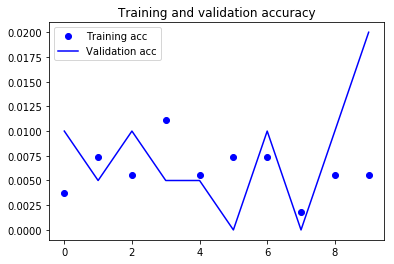

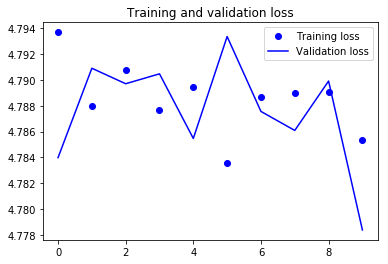

In [76]:
#Your code here; visualize the training / validation history associated with fitting the model.
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [77]:
#Save model
#Save model
model.save('vgg19_FE_AUG_10epochs.h5')

In [78]:
import pickle
with open('history_vgg19_10epochs.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(history, f, pickle.HIGHEST_PROTOCOL)

## Final Model Evaluation

In [79]:
#Your code here
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(240, 240),
        batch_size=20,
        class_mode='categorical',
        shuffle=False)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=54)
y_hat_test = model.predict_generator(test_generator, steps=54)
print('Generated {} predictions'.format(len(y_hat_test)))
print('test acc:', test_acc)

Found 1078 images belonging to 120 classes.
Generated 1078 predictions
test acc: 0.006493506521152432


## Summary

Congratulations! In this lab, you brought all of your prior deep learning skills together from preprocessing including one-hot encoding, to adapting a pretrained model. There are always ongoing advancements in CNN architectures and best practices, but you have a solid foundation and understanding at this point.